### Importing libraries needed for project

In [221]:
#importing libraires I will most likely need
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

### Load in our stroke data as a dataframe

In [158]:
stroke_data = pd.read_csv('Desktop/datasets/healthcare-dataset-stroke-data.csv')

In [159]:
pd.set_option('display.max_rows', 200)

### Exploratory Data Analysis

In [160]:
#looking at the first 30 lines of our stroke data
stroke_data.head(30)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [161]:
###check columns with null values
stroke_data.columns[stroke_data.isnull().any()]

Index(['bmi'], dtype='object')

In [162]:
#luckily, only the bmi column has null values, so let's see how many null values there are to give us an idea the best way
#to deal with this problem
stroke_data['bmi'].isnull().sum(axis = 0)

201

In [163]:
#I don't need the id column so I drop it
new_stroke_df = stroke_data.drop('id', axis=1)

In [164]:
#number of people with vs without stroke from dataset
new_stroke_df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [165]:
#number of people with vs without heart_disease from dataset
new_stroke_df['heart_disease'].value_counts()

0    4834
1     276
Name: heart_disease, dtype: int64

In [166]:
new_stroke_df['hypertension'].value_counts()

0    4612
1     498
Name: hypertension, dtype: int64

In [167]:
new_stroke_df['age'].max()

82.0

In [168]:
new_stroke_df['age'].min()

0.08

<AxesSubplot:xlabel='stroke', ylabel='count'>

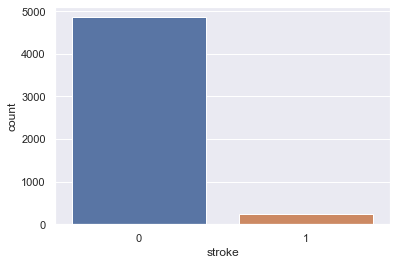

In [169]:
## plot number of people with and without stroke
sns.set_theme(style="darkgrid")
sns.countplot(new_stroke_df['stroke'])

In [170]:
#view the correlation between numerical attributes in the dataset
new_stroke_df.corr()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257
hypertension,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904
heart_disease,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914
avg_glucose_level,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945
bmi,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000


In [171]:
#since we have very small percentage of people with stroke from the dataset, it won't be wise to remove rows with null
#bmi values if the stroke value is positive (1). So checking to see what the stroke value was for the NaN bmi's will
#give a better idea what next to do
new_stroke_df[new_stroke_df['bmi'].isnull()& (new_stroke_df['stroke']==1)].describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,40.000000,40.00000,40.000000,40.000000,0.0,40.0
mean,67.808000,0.15000,0.175000,121.955500,NaN,1.0
std,14.478762,0.36162,0.384808,58.622789,NaN,0.0
min,1.320000,0.00000,0.000000,57.920000,NaN,1.0
25%,61.000000,0.00000,0.000000,75.245000,NaN,1.0
50%,74.000000,0.00000,0.000000,101.450000,NaN,1.0
75%,77.250000,0.00000,0.000000,174.712500,NaN,1.0
max,80.000000,1.00000,1.000000,237.750000,NaN,1.0


In [172]:
#I will drop the bmi column since all NaN instances have a stroke value of 1 & it has a very low/ the least correlation 
#with our target varialbe (stroke) as seen in the correlation matrix above
new_stroke_df['bmi'].fillna(value=new_stroke_df['bmi'].mean(),inplace=True)

In [173]:
#look at what our data looks like now
new_stroke_df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [174]:
#double check to make sure no null values
new_stroke_df.columns[new_stroke_df.isnull().any()]

Index([], dtype='object')

In [175]:
new_stroke_df['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [176]:
#Smoking status of "Unknown" doesn't help us much but it will also be unwise to randomly replace with one of the other
#smoking status labels since these are the 2nd largest in the dataset with 1544 records, so I check to see how many of
#'Unknown' labels are also stroke positive since the dataset is imbalanced (very few stroke positive samples which is our
#target)
new_stroke_df.loc[(new_stroke_df['smoking_status']=='Unknown')&(new_stroke_df['stroke']==1)].describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,47.000000,47.000000,47.000000,47.000000,47.000000,47.0
mean,65.836596,0.085106,0.170213,124.808936,29.176133,1.0
std,16.236866,0.282057,0.379883,57.067115,5.022184,0.0
min,1.320000,0.000000,0.000000,57.930000,19.400000,1.0
25%,58.000000,0.000000,0.000000,80.065000,26.950000,1.0
50%,71.000000,0.000000,0.000000,101.450000,28.893237,1.0
75%,77.500000,0.000000,0.000000,179.755000,29.596618,1.0
max,82.000000,1.000000,1.000000,219.910000,45.900000,1.0


<AxesSubplot:xlabel='smoking_status', ylabel='count'>

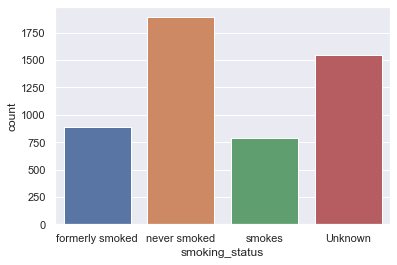

In [177]:
sns.set_theme(style="darkgrid")
sns.countplot(new_stroke_df['smoking_status'])

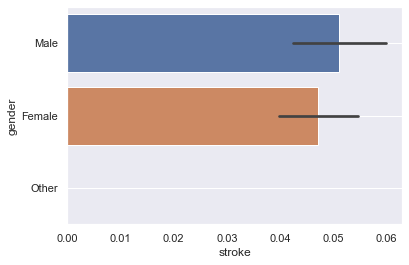

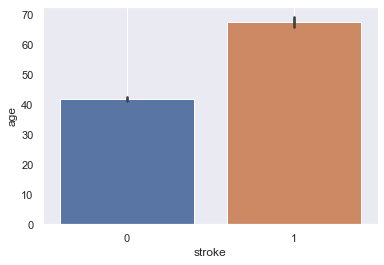

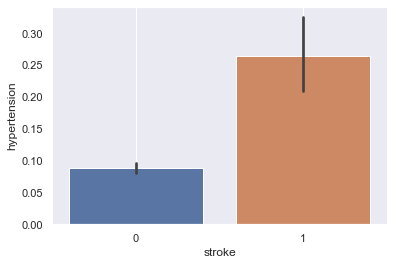

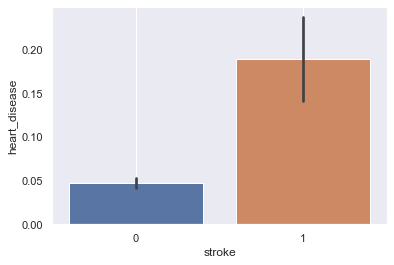

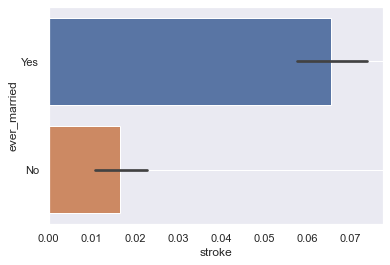

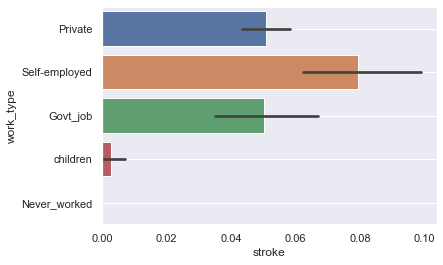

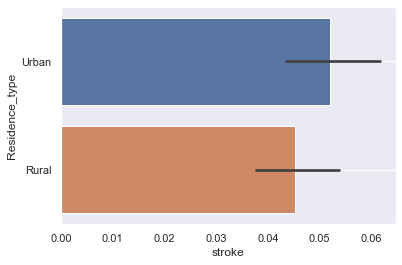

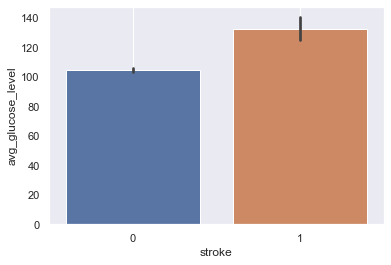

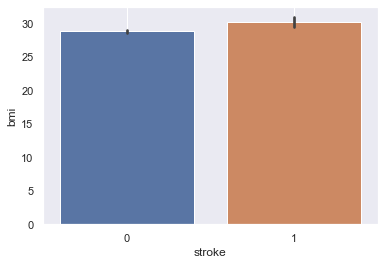

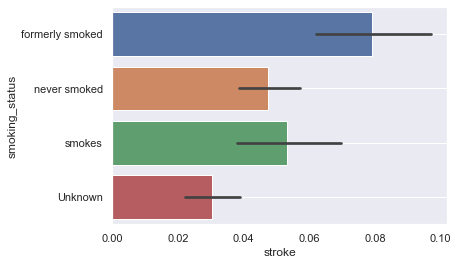

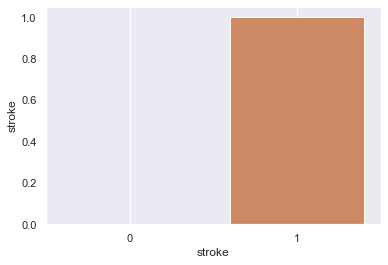

In [178]:
#see how stroke relates with the other attributes given in the data
for i, column in enumerate(new_stroke_df.columns):
    sns.barplot(x='stroke', y=column, data=new_stroke_df)
    plt.grid()
    plt.show()

In [179]:
#from the above, we see that stroke is slightly higher amongst males, the higher the age the more prone to stroke people 
#get,those who have suffered hypertension are more likely to stroke, those that have suffered heart disease are more 
#likely to suffer stroke, married people are more likely to suffer stroke, self-employed people are most likely to 
#suffer stroke,those with higer glucose levels are more likely to suffer stroke, those who have formely smoked are more 
#likely to suffer stroke followed by those that smoke and so on as seen from the figures above.

In [180]:
#using label encoding for the categorical columns with text values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [181]:
#cleaned_stroke_data['age'] = le.fit_transform(cleaned_stroke_data['stroke'])
new_stroke_df['avg_glucose_level'] = le.fit_transform(new_stroke_df['avg_glucose_level'])
new_stroke_df['hypertension'] = le.fit_transform(new_stroke_df['hypertension'])
new_stroke_df['heart_disease'] =le.fit_transform(new_stroke_df['heart_disease'])
new_stroke_df['ever_married'] = le.fit_transform(new_stroke_df['ever_married'])
new_stroke_df['Residence_type'] = le.fit_transform(new_stroke_df['Residence_type'])
new_stroke_df['smoking_status'] =le.fit_transform(new_stroke_df['smoking_status'])
new_stroke_df['work_type'] =le.fit_transform(new_stroke_df['work_type'])
new_stroke_df['gender'] =le.fit_transform(new_stroke_df['gender'])

In [182]:
new_stroke_df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,3850,36.600000,1,1
1,0,61.0,0,0,1,3,0,3588,28.893237,2,1
2,1,80.0,0,1,1,2,0,2483,32.500000,2,1
3,0,49.0,0,0,1,2,1,3385,34.400000,3,1
4,0,79.0,1,0,1,3,0,3394,24.000000,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,1360,28.893237,2,0
5106,0,81.0,0,0,1,3,1,3030,40.000000,2,0
5107,0,35.0,0,0,1,3,0,1314,30.600000,2,0
5108,1,51.0,0,0,1,2,0,3363,25.600000,1,0


In [183]:
#transform the data to be on same scale using sklearn's StandardScaler()

In [184]:
from sklearn.preprocessing import StandardScaler

In [185]:
scale = StandardScaler()

In [186]:
X = new_stroke_df.drop('stroke',axis=1)
y = new_stroke_df['stroke']

In [187]:
X

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,2,1,3850,36.600000,1
1,0,61.0,0,0,1,3,0,3588,28.893237,2
2,1,80.0,0,1,1,2,0,2483,32.500000,2
3,0,49.0,0,0,1,2,1,3385,34.400000,3
4,0,79.0,1,0,1,3,0,3394,24.000000,2
...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,1360,28.893237,2
5106,0,81.0,0,0,1,3,1,3030,40.000000,2
5107,0,35.0,0,0,1,3,0,1314,30.600000,2
5108,1,51.0,0,0,1,2,0,3363,25.600000,1


In [188]:
X = scale.fit_transform(X)

In [189]:
X

array([[ 1.18807255e+00,  1.05143428e+00, -3.28601864e-01, ...,
         1.78017003e+00,  1.00123401e+00, -3.51780710e-01],
       [-8.40343999e-01,  7.86070073e-01, -3.28601864e-01, ...,
         1.54302885e+00,  1.38466607e-15,  5.81552327e-01],
       [ 1.18807255e+00,  1.62639008e+00, -3.28601864e-01, ...,
         5.42872325e-01,  4.68577254e-01,  5.81552327e-01],
       ...,
       [-8.40343999e-01, -3.63841511e-01, -3.28601864e-01, ...,
        -5.15211816e-01,  2.21736316e-01,  5.81552327e-01],
       [ 1.18807255e+00,  3.43796387e-01, -3.28601864e-01, ...,
         1.33937707e+00, -4.27845098e-01, -3.51780710e-01],
       [-8.40343999e-01,  3.42048064e-02, -3.28601864e-01, ...,
        -3.88495153e-01, -3.49895329e-01, -1.28511375e+00]])

In [190]:
#splitting the data into my train and test set in a stratified fashion using the stroke labels so there is a well
#distributed proportion of stroke labels in each set since there are few stroke positive samples compared to the rest of 
#the samples.
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [191]:
#so we can see how many of each instances of the stroke's labels are in our dependent variable
np.unique(y_train, return_counts=True)

(array([0, 1], dtype=int64), array([3889,  199], dtype=int64))

In [192]:
#We see 47 samples have a smoking status of unknown which doesn't give us the information we want about their smoking
#status. I am going to use an oversampling technique called SMOTE since this dataset is very imbalanced with regard
#and drop this rows with 'unknown' smoking status
from imblearn.over_sampling import SMOTE

In [193]:
#using SMOTE to resample the training set
smt = SMOTE(random_state=42)
X_train_sm,y_train_sm = smt.fit_resample(X_train,y_train)

In [194]:
#so we can see how many instance of each class labels in our dependent variable after SMOTE
np.unique(y_train_sm, return_counts=True)

(array([0, 1], dtype=int64), array([3889, 3889], dtype=int64))

In [195]:
model = LogisticRegression().fit(X_train_sm,y_train_sm)

In [196]:
#using the trained model on the test set
pred_y = model.predict(X_test)

In [225]:
print("Score on training set: {}".format(model.score(X_train,y_train)))
print("Score on test set: {}".format(model.score(X_test,y_test)))

Score on training set: 0.7438845401174168
Score on test set: 0.7583170254403131


In [226]:
#using classification report to also view more important metrics such as precision and recall,
#we can see the logistic regression did quite well
print("Claasification report")
print(classification_report(y_test, pred_y))

Claasification report
              precision    recall  f1-score   support

           0       0.99      0.76      0.86       972
           1       0.14      0.80      0.24        50

    accuracy                           0.76      1022
   macro avg       0.57      0.78      0.55      1022
weighted avg       0.95      0.76      0.83      1022



In [199]:
#The logistic regression model has a an ok score of 0.74 from the training data & 0.758 on the test
#on the test set

In [200]:
#using a confusion matrix to see the number of correctly classified samples for our test data
from sklearn.metrics import confusion_matrix

In [201]:
cm = confusion_matrix(y_test, pred_y)
print(np.unique(y_test, return_counts=True))
print(np.unique(pred_y, return_counts=True))
print(cm)

(array([0, 1], dtype=int64), array([972,  50], dtype=int64))
(array([0, 1], dtype=int64), array([745, 277], dtype=int64))
[[735 237]
 [ 10  40]]


Text(80.90000000000006, 0.5, 'true values')

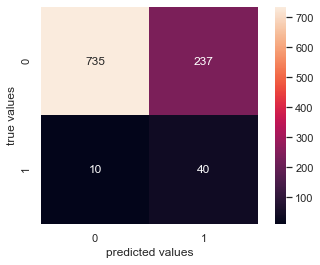

In [202]:
#we can see that we have 735 True negatives (no stroke) and 40 True postives (stroke) and a low false negative
#which is quite good given we don't want to miss knowing patients likely to have stroke so we could warn them
#Using a heatmap to make the results from the confusion matrix of our logistic model more readable
sns.heatmap(cm,square=True,annot=True,fmt='d',cbar='True')
plt.xlabel('predicted values')
plt.ylabel('true values')

In [203]:
#Using a random forest classifier with 10 trees and bootstrapping enabled so wd use different combinations of features to
#build each tree to see how this perfroms on the dataset in contrast to my logistic model.
rf_clf = RandomForestClassifier(n_estimators=10, bootstrap=True,max_depth=16, random_state=0)

In [204]:
rf_clf.fit(X_train_sm,y_train_sm)

RandomForestClassifier(max_depth=16, n_estimators=10, random_state=0)

In [227]:
print("Score on training set: {}".format(rf_clf.score(X_train,y_train)))
print("Score on test set: {}".format(rf_clf.score(X_test,y_test)))

Score on training set: 0.9816536203522505
Score on test set: 0.9070450097847358


In [228]:
y_pred = rf_clf.predict(X_test)

In [232]:
#we can see that our random forest model has a slightly better precision but a far worse recall on 
#the stroke positive class  
print("Claasification report")
print(classification_report(y_test, y_pred))

Claasification report
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       972
           1       0.15      0.20      0.17        50

    accuracy                           0.91      1022
   macro avg       0.56      0.57      0.56      1022
weighted avg       0.92      0.91      0.91      1022



In [230]:
#using a confusion matrix to see how many of our predictions were correct on the test set using random forest
rf_cm = confusion_matrix(y_test, y_pred)
print(np.unique(y_test, return_counts=True))
print(np.unique(y_pred, return_counts=True))
print(rf_cm)

(array([0, 1], dtype=int64), array([972,  50], dtype=int64))
(array([0, 1], dtype=int64), array([957,  65], dtype=int64))
[[917  55]
 [ 40  10]]


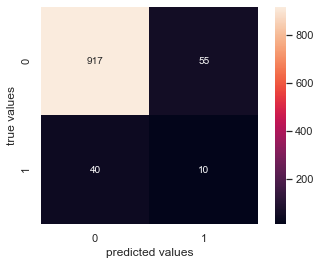

In [231]:
#using a heatmap to make the random forest's confusion matrix for the test set more readable
sns.heatmap(rf_cm,square=True,annot=True,fmt='d',cbar='True')
plt.xlabel('predicted values')
plt.ylabel('true values');

In [211]:
#from the above, we see that the random forest generalizes well and correctly identifies 5 stroke patients on the data it
#hasn't been exposed to before. The model also correctly identifies 970 non-stroke patients.This is considered good 
#because from the original dataset 95.1% of the samples don't have stroke.

#We also see it does very well on the 

In [212]:
#Using KNN

In [213]:
from sklearn.neighbors import KNeighborsClassifier

In [246]:
#although there is no clear cut out way to find the optimal value of k, I will try k within the range 3 to 13 and pick the
#value of k with the best accuracy
neighbors = np.arange(3,13)

#fig, axes = plt.subplots(2,5,figsize=(10,3))

for k in neighbors:
    knn_model = KNeighborsClassifier(n_neighbors = k)
    knn_model.fit(X_train_sm,y_train_sm)
    knn_y_pred = knn_model.predict(X_test)
    y_ =  knn_model.predict(X_train)
    knn_cm = confusion_matrix(y_test, knn_y_pred)

    print("when k is {}".format(k))
    print("test set confusion matrix")
    print(knn_cm)
    print("training set accuracy is {}:".format(knn_model.score(X_train,y_train)))
    print("test set accuracy is: {}".format(knn_model.score(X_test,y_test)))
    print("Claasification report")
    print(classification_report(y_test, knn_y_pred))
    print()

when k is 3
test set confusion matrix
[[842 130]
 [ 35  15]]
training set accuracy is 0.9275929549902152:
test set accuracy is: 0.8385518590998043
Claasification report
              precision    recall  f1-score   support

           0       0.96      0.87      0.91       972
           1       0.10      0.30      0.15        50

    accuracy                           0.84      1022
   macro avg       0.53      0.58      0.53      1022
weighted avg       0.92      0.84      0.87      1022


when k is 4
test set confusion matrix
[[855 117]
 [ 37  13]]
training set accuracy is 0.9346868884540117:
test set accuracy is: 0.8493150684931506
Claasification report
              precision    recall  f1-score   support

           0       0.96      0.88      0.92       972
           1       0.10      0.26      0.14        50

    accuracy                           0.85      1022
   macro avg       0.53      0.57      0.53      1022
weighted avg       0.92      0.85      0.88      1022


when k

In [248]:
#we see from the output above, our results vary quite a bit based on the value of k. In choosing the value for k, since we
#have 2 classes, I decided to go for an odd value of k that generalizes well both on the training and test set although you
#can also break ties when they happen. I would go for k=5 as it generalizes quite well on the data and has a lower false 
#negative than k=3 since what we our looking at predicting is catching the possibilities of stroke and we don't want 
#to miss this in patients it could happen to so there is the possiblity of preventing its occurence
chosen_knn_model = KNeighborsClassifier(n_neighbors = 5)
chosen_knn_model.fit(X_train_sm,y_train_sm)
knn_y_pred = chosen_knn_model.predict(X_test)
y_ =  knn_model.predict(X_train)
knn_cm = confusion_matrix(y_test, knn_y_pred)
knn_cm

array([[813, 159],
       [ 31,  19]], dtype=int64)

Text(80.90000000000006, 0.5, 'true values')

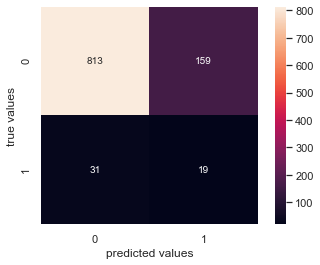

In [249]:
#using a heatmap to make the knn's confusion matrix for the test set more readable
sns.heatmap(knn_cm,square=True,annot=True,fmt='d',cbar='True')
plt.xlabel('predicted values')
plt.ylabel('true values')

In [217]:
#knn_model.get_params()